In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


# Install Packages

In [ ]:
!pip install tld

# Import Packages

In [ ]:
import pandas as pd
import numpy as np
import os
import itertools
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import xgboost as xgb
from lightgbm import DaskLGBMClassifier
import seaborn as sns
import re
from googlesearch import search
from urllib.parse import urlparse
from urllib.parse import urlparse
from tld import get_tld
import os
from urllib.request import urlopen
import requests
import nltk
from bs4 import BeautifulSoup
import urllib.parse
from urllib.parse import urlparse


# Install require files

In [ ]:
#Need to change headers respect to the system...

headers = {
	"User-Agent" : "Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Mobile Safari/537.36"
}

nltk.download('punkt')
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data Preprocessing

In [ ]:
df1 = pd.read_csv("/content/initial_urls.csv")
df2 = pd.read_csv("/content/additional_urls (1).csv")
print(df1.head())
print(df2.head())

                                              domain  label
0  nobell.it/70ffb52d079109dca5664cce6f317373782/...    1.0
1  www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...    1.0
2  serviciosbys.com/paypal.cgi.bin.get-into.herf....    1.0
3  mail.printakid.com/www.online.americanexpress....    1.0
4  thewhiskeydregs.com/wp-content/themes/widescre...    1.0
   Unnamed: 0                        url   label  result
0           0     https://www.google.com  benign       0
1           1    https://www.youtube.com  benign       0
2           2   https://www.facebook.com  benign       0
3           3      https://www.baidu.com  benign       0
4           4  https://www.wikipedia.org  benign       0


In [ ]:
def initial_read(dataframe):
    print('SHAPE')
    print(dataframe.shape) #display no of rows and columns
    print('-------')
    print('DTYPES')
    print(dataframe.dtypes) #data types of different columns
    print('-------')
    print('NULL VALUES')
    print(dataframe.isnull().sum()) #display sum of total null valued rows of each columns
    print('-------')


In [ ]:
initial_read(df1)

SHAPE
(96005, 2)
-------
DTYPES
domain     object
label     float64
dtype: object
-------
NULL VALUES
domain     0
label     92
dtype: int64
-------


In [ ]:
initial_read(df2)

SHAPE
(450176, 4)
-------
DTYPES
Unnamed: 0     int64
url           object
label         object
result         int64
dtype: object
-------
NULL VALUES
Unnamed: 0    0
url           0
label         0
result        0
dtype: int64
-------


In [ ]:
print(df1.isnull().sum())

domain     0
label     92
dtype: int64


In [ ]:
df1.dropna(inplace=True)

In [ ]:
print(df2.isnull().sum())

Unnamed: 0    0
url           0
label         0
result        0
dtype: int64


In [ ]:
df2.drop(columns = ['Unnamed: 0','label'], inplace=True)

In [ ]:
df1['label']=df1['label'].astype(int) #changing float dtype of label to int
print(df1.dtypes)

domain    object
label      int64
dtype: object


In [ ]:
df1.rename(columns={"domain": "url", "label": "phishing"},inplace=True) #changing column names to url and phishing of df
print(df1.columns)
print(df1.head())

Index(['url', 'phishing'], dtype='object')
                                                 url  phishing
0  nobell.it/70ffb52d079109dca5664cce6f317373782/...         1
1  www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...         1
2  serviciosbys.com/paypal.cgi.bin.get-into.herf....         1
3  mail.printakid.com/www.online.americanexpress....         1
4  thewhiskeydregs.com/wp-content/themes/widescre...         1


In [ ]:
df2.rename(columns={"result": "phishing"},inplace=True)
print(df2.columns)
print(df2.head())

Index(['url', 'phishing'], dtype='object')
                         url  phishing
0     https://www.google.com         0
1    https://www.youtube.com         0
2   https://www.facebook.com         0
3      https://www.baidu.com         0
4  https://www.wikipedia.org         0


In [ ]:
df1['url']= 'https://' + df1['url'].astype(str) #adding protocols to urls
print(df1.head())

                                                 url  phishing
0  https://nobell.it/70ffb52d079109dca5664cce6f31...         1
1  https://www.dghjdgf.com/paypal.co.uk/cycgi-bin...         1
2  https://serviciosbys.com/paypal.cgi.bin.get-in...         1
3  https://mail.printakid.com/www.online.american...         1
4  https://thewhiskeydregs.com/wp-content/themes/...         1


In [ ]:
df_final = pd.concat([df1,df2]) #concatenate df and df2
#initial_read(df_final)
print(df_final[df_final.duplicated()])
df_final .drop_duplicates(inplace=True) #drop duplicate rows..
print(df_final[df_final.duplicated()])

                                                      url  phishing
35411                      https://bin/webscr?cmd=_login-         1
45182   https://'www.allegropl.xaa.pl/enter_login.html...         1
129252              https://www.airnav.com/airports/us/TX         0
140534                   https://www.apple.com/quicktime/         0
167423           https://www.conitec.net/english/gstudio/         0
...                                                   ...       ...
345307  https://homepage.ntlworld.com/fetchfido2/inter...         0
345310       https://www.infopeople.org/search/chart.html         0
345313           https://l-lists.com/en/lists/lv2azk.html         0
345318    https://www.bruceclay.com/searchenginechart.pdf         0
345324      https://www.topix.com/business/search-engines         0

[194 rows x 2 columns]
Empty DataFrame
Columns: [url, phishing]
Index: []


In [ ]:
df_final.shape

(545895, 2)

In [ ]:
df_final.to_csv("final_urls.csv",index=False)
df_final

,url,phishing
0,https://nobell.it/70ffb52d079109dca5664cce6f31...,1
1,https://www.dghjdgf.com/paypal.co.uk/cycgi-bin...,1
2,https://serviciosbys.com/paypal.cgi.bin.get-in...,1
3,https://mail.printakid.com/www.online.american...,1
4,https://thewhiskeydregs.com/wp-content/themes/...,1
...,...,...
450171,http://ecct-it.com/docmmmnn/aptgd/index.php,1
450172,http://faboleena.com/js/infortis/jquery/plugin...,1
450173,http://faboleena.com/js/infortis/jquery/plugin...,1
450174,http://atualizapj.com/,1


In [ ]:
print(df1.columns)
print(df2.columns)
print(f" \nnew dataset Length:     {len(df_final)}")

Index(['url', 'phishing'], dtype='object')
Index(['url', 'phishing'], dtype='object')
 
new dataset Length:     545895


# Read Final Dataset

<ipython-input-49-ed6d04861482>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.countplot(x=df["phishing"],


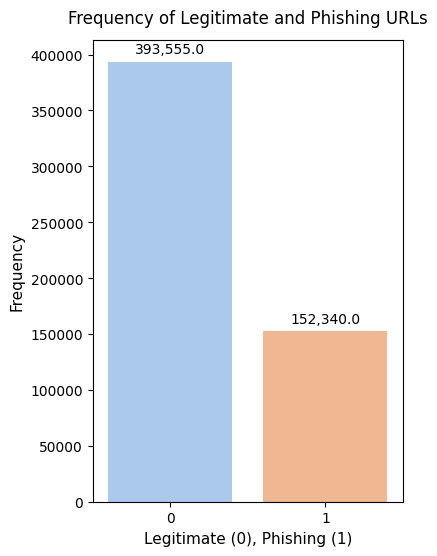

In [ ]:
#Read final dataset

df = pd.read_csv("/content/final_urls.csv")
plt.figure(figsize = (4, 6))
bar = sns.countplot(x=df["phishing"],
              data=df,
              palette="pastel")
for p in bar.patches:
    bar.annotate(format(p.get_height(), ','),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.title('Frequency of Legitimate and Phishing URLs', fontsize = 12, pad = 12)
plt.xlabel('Legitimate (0), Phishing (1)', fontsize = 11)
plt.ylabel("Frequency",fontsize = 11)
plt.show()

# Feature definitions

In [ ]:
def haveIP(url):
  match = re.search(
      '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
      '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'
      '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1-2})\\.(0x[0-9a-fA-F]{1,2})\\/)'
      '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}',url)

  if match:
        return 1
  else:
        return 0


df['haveIP'] = df['url'].apply(lambda i : haveIP(i))

df.head(10)

,url,phishing,haveIP
0,https://nobell.it/70ffb52d079109dca5664cce6f31...,1,0
1,https://www.dghjdgf.com/paypal.co.uk/cycgi-bin...,1,0
2,https://serviciosbys.com/paypal.cgi.bin.get-in...,1,0
3,https://mail.printakid.com/www.online.american...,1,0
4,https://thewhiskeydregs.com/wp-content/themes/...,1,0
5,https://smilesvoegol.servebbs.org/voegol.php,1,0
6,https://premierpaymentprocessing.com/includes/...,1,0
7,https://myxxxcollection.com/v1/js/jih321/bpd.c...,1,0
8,https://super1000.info/docs,1,0
9,https://horizonsgallery.com/js/bin/ssl1/_id/ww...,1,0


In [ ]:

def IsGoogleIndex(url):
  site = search(url,5)
  if site:
    return 1
  else:
    return 0

df['IsGoogleIndex'] = df['url'].apply(lambda i : IsGoogleIndex(i))

df.head()

,url,phishing,haveIP,IsGoogleIndex
0,https://nobell.it/70ffb52d079109dca5664cce6f31...,1,0,1
1,https://www.dghjdgf.com/paypal.co.uk/cycgi-bin...,1,0,1
2,https://serviciosbys.com/paypal.cgi.bin.get-in...,1,0,1
3,https://mail.printakid.com/www.online.american...,1,0,1
4,https://thewhiskeydregs.com/wp-content/themes/...,1,0,1


In [ ]:
shortening_services = r"bit.ly|goo.gl|shorte.st|go2l.ink|x.co|ow.ly|t.co|tinyurl|tr.im|is.gd|cli.gs|" \
                      r"yfrog.com|migre.me|ff.im|tiny.cc|url4.eu|twit.ac|su.pr|twurl.nl|snipurl.com|" \
                      r"short.to|BudURL.com|ping.fm|post.ly|Just.as|bkite.com|snipr.com|fic.kr|loopt.us|" \
                      r"doiop.com|short.ie|kl.am|wp.me|rubyurl.com|om.ly|to.ly|bit.do|t.co|lnkd.in|db.tt|" \
                      r"qr.ae|adf.ly|goo.gl|bitly.com|cur.lv|tinyurl.com|ow.ly|bit.ly|ity.im|q.gs|is.gd|" \
                      r"po.st|bc.vc|twitthis.com|u.to|j.mp|buzurl.com|cutt.us|u.bb|yourls.org|x.co|" \
                      r"prettylinkpro.com|scrnch.me|filoops.info|vzturl.com|qr.net|1url.com|tweez.me|v.gd|" \
                      r"tr.im|link.zip.net"

def is_shortening_services(url):
  match = re.search(shortening_services,url)
  if match:
    return 1

  else:
    return 0

df['is_shortening_services'] = df['url'].apply(lambda i : is_shortening_services(i))

df.head()

,url,phishing,haveIP,IsGoogleIndex,is_shortening_services
0,https://nobell.it/70ffb52d079109dca5664cce6f31...,1,0,1,0
1,https://www.dghjdgf.com/paypal.co.uk/cycgi-bin...,1,0,1,1
2,https://serviciosbys.com/paypal.cgi.bin.get-in...,1,0,1,0
3,https://mail.printakid.com/www.online.american...,1,0,1,0
4,https://thewhiskeydregs.com/wp-content/themes/...,1,0,1,0


In [ ]:
keywords = 'login|signin|account|update|free|luck|draw|luckydraw|bonus|paypal|ebay|paytm|service'

def suspicious_keywords(url):
  match = re.search(keywords,url)


  if match:
    return 1

  else:
    return 0

df['suspicious_keywords'] = df['url'].apply(lambda i : suspicious_keywords(i))

df.head()

,url,phishing,haveIP,IsGoogleIndex,is_shortening_services,suspicious_keywords
0,https://nobell.it/70ffb52d079109dca5664cce6f31...,1,0,1,0,1
1,https://www.dghjdgf.com/paypal.co.uk/cycgi-bin...,1,0,1,1,1
2,https://serviciosbys.com/paypal.cgi.bin.get-in...,1,0,1,0,1
3,https://mail.printakid.com/www.online.american...,1,0,1,0,0
4,https://thewhiskeydregs.com/wp-content/themes/...,1,0,1,0,0


In [ ]:


def abnormal_url(url):
  hostname = urlparse(url).hostname
  hostname = str(hostname)
  print(url,"------>",hostname)
  try:
    match = re.search(hostname,url)

    if match:
      return 1
    else:
      return 0

  except:
    return 0

df['abnormal_url'] = df['url'].apply(lambda i: abnormal_url(i))

df.head()

Streaming output truncated to the last 5000 lines.
https://sevappseilgoog.blogspot.com/ ------> sevappseilgoog.blogspot.com
https://teqsacb54f687b19support.blogspot.com/ ------> teqsacb54f687b19support.blogspot.com
http://ross.cd/kidsmovies/hp_s_ervice.html ------> ross.cd
http://perso.menara.ma/~zghari/notex/ ------> perso.menara.ma
http://viescas.com/Tips/language/_spea_ing6.html ------> viescas.com
http://www.angelfire.com/crazy/babyblue_princess543/babyblue/ ------> www.angelfire.com
http://caspianglobalservices.com/fonts/.hennessy/ ------> caspianglobalservices.com
http://d662653.u-telcom.net/west/ayo1/ayo1/ayo1/ ------> d662653.u-telcom.net
http://d662653.u-telcom.net/can/ayo1/ayo1/ayo1/ ------> d662653.u-telcom.net
http://123xsallowed.com/facebook001/index_1012145abdgjahdskjahjdhqiue54878akjdhkjashdhahdghjabgdfbhasbf21544878asdasndashdggashdg.htm ------> 123xsallowed.com
http://caspianglobalservices.com/awosoke/fud/formfix/form/ ------> caspianglobalservices.com
http://www.tinta

,url,phishing,haveIP,IsGoogleIndex,is_shortening_services,suspicious_keywords,abnormal_url
0,https://nobell.it/70ffb52d079109dca5664cce6f31...,1,0,1,0,1,1
1,https://www.dghjdgf.com/paypal.co.uk/cycgi-bin...,1,0,1,1,1,1
2,https://serviciosbys.com/paypal.cgi.bin.get-in...,1,0,1,0,1,1
3,https://mail.printakid.com/www.online.american...,1,0,1,0,0,1
4,https://thewhiskeydregs.com/wp-content/themes/...,1,0,1,0,0,1


In [ ]:
def is_https(url):
  return url.count('https')

df['is_https'] = df['url'].apply(lambda i : is_https(i))

df.head()

,url,phishing,haveIP,IsGoogleIndex,is_shortening_services,suspicious_keywords,abnormal_url,is_https
0,https://nobell.it/70ffb52d079109dca5664cce6f31...,1,0,1,0,1,1,1
1,https://www.dghjdgf.com/paypal.co.uk/cycgi-bin...,1,0,1,1,1,1,1
2,https://serviciosbys.com/paypal.cgi.bin.get-in...,1,0,1,0,1,1,1
3,https://mail.printakid.com/www.online.american...,1,0,1,0,0,1,1
4,https://thewhiskeydregs.com/wp-content/themes/...,1,0,1,0,0,1,1


In [ ]:
def is_http(url):
  return url.count('http')

df['is_http'] = df['url'].apply(lambda i : is_http(i))

df.head()

,url,phishing,haveIP,IsGoogleIndex,is_shortening_services,suspicious_keywords,abnormal_url,is_https,is_http
0,https://nobell.it/70ffb52d079109dca5664cce6f31...,1,0,1,0,1,1,1,1
1,https://www.dghjdgf.com/paypal.co.uk/cycgi-bin...,1,0,1,1,1,1,1,1
2,https://serviciosbys.com/paypal.cgi.bin.get-in...,1,0,1,0,1,1,1,1
3,https://mail.printakid.com/www.online.american...,1,0,1,0,0,1,1,1
4,https://thewhiskeydregs.com/wp-content/themes/...,1,0,1,0,0,1,1,1


In [ ]:
def redirection(url):
  pos=url.count('//')
  if pos>1:
    return 1
  else:
    return 0

df['redirection'] = df['url'].apply(lambda i : redirection(i))

df.head()

,url,phishing,haveIP,IsGoogleIndex,is_shortening_services,suspicious_keywords,abnormal_url,is_https,is_http,redirection
0,https://nobell.it/70ffb52d079109dca5664cce6f31...,1,0,1,0,1,1,1,1,0
1,https://www.dghjdgf.com/paypal.co.uk/cycgi-bin...,1,0,1,1,1,1,1,1,0
2,https://serviciosbys.com/paypal.cgi.bin.get-in...,1,0,1,0,1,1,1,1,0
3,https://mail.printakid.com/www.online.american...,1,0,1,0,0,1,1,1,0
4,https://thewhiskeydregs.com/wp-content/themes/...,1,0,1,0,0,1,1,1,1


In [ ]:
def questionmark(url):
  if '?' in url:
    return 1
  else:
    return 0

df['questionmark'] = df['url'].apply(lambda i : questionmark(i))

df.head()

,url,phishing,haveIP,IsGoogleIndex,is_shortening_services,suspicious_keywords,abnormal_url,is_https,is_http,redirection,questionmark
0,https://nobell.it/70ffb52d079109dca5664cce6f31...,1,0,1,0,1,1,1,1,0,1
1,https://www.dghjdgf.com/paypal.co.uk/cycgi-bin...,1,0,1,1,1,1,1,1,0,0
2,https://serviciosbys.com/paypal.cgi.bin.get-in...,1,0,1,0,1,1,1,1,0,0
3,https://mail.printakid.com/www.online.american...,1,0,1,0,0,1,1,1,0,0
4,https://thewhiskeydregs.com/wp-content/themes/...,1,0,1,0,0,1,1,1,1,1


In [ ]:
def hyphen(url):
  if '-' in url:
    return 1
  else:
    return 0

df['hyphen'] = df['url'].apply(lambda i : hyphen(i))

df.head()

,url,phishing,haveIP,IsGoogleIndex,is_shortening_services,suspicious_keywords,abnormal_url,is_https,is_http,redirection,questionmark,hyphen
0,https://nobell.it/70ffb52d079109dca5664cce6f31...,1,0,1,0,1,1,1,1,0,1,1
1,https://www.dghjdgf.com/paypal.co.uk/cycgi-bin...,1,0,1,1,1,1,1,1,0,0,1
2,https://serviciosbys.com/paypal.cgi.bin.get-in...,1,0,1,0,1,1,1,1,0,0,1
3,https://mail.printakid.com/www.online.american...,1,0,1,0,0,1,1,1,0,0,0
4,https://thewhiskeydregs.com/wp-content/themes/...,1,0,1,0,0,1,1,1,1,1,1


In [ ]:
def equals(url):
  if '=' in url:
    return 1
  else:
    return 0

df['equals'] = df['url'].apply(lambda i : equals(i))

df.head()

,url,phishing,haveIP,IsGoogleIndex,is_shortening_services,suspicious_keywords,abnormal_url,is_https,is_http,redirection,questionmark,hyphen,equals
0,https://nobell.it/70ffb52d079109dca5664cce6f31...,1,0,1,0,1,1,1,1,0,1,1,1
1,https://www.dghjdgf.com/paypal.co.uk/cycgi-bin...,1,0,1,1,1,1,1,1,0,0,1,1
2,https://serviciosbys.com/paypal.cgi.bin.get-in...,1,0,1,0,1,1,1,1,0,0,1,0
3,https://mail.printakid.com/www.online.american...,1,0,1,0,0,1,1,1,0,0,0,0
4,https://thewhiskeydregs.com/wp-content/themes/...,1,0,1,0,0,1,1,1,1,1,1,0


In [ ]:
def percentage(url):
  if '%' in url:
    return 1
  else:
    return 0

df['percentage'] = df['url'].apply(lambda i : percentage(i))

df.head()


,url,phishing,haveIP,IsGoogleIndex,is_shortening_services,suspicious_keywords,abnormal_url,is_https,is_http,redirection,questionmark,hyphen,equals,percentage
0,https://nobell.it/70ffb52d079109dca5664cce6f31...,1,0,1,0,1,1,1,1,0,1,1,1,0
1,https://www.dghjdgf.com/paypal.co.uk/cycgi-bin...,1,0,1,1,1,1,1,1,0,0,1,1,0
2,https://serviciosbys.com/paypal.cgi.bin.get-in...,1,0,1,0,1,1,1,1,0,0,1,0,0
3,https://mail.printakid.com/www.online.american...,1,0,1,0,0,1,1,1,0,0,0,0,0
4,https://thewhiskeydregs.com/wp-content/themes/...,1,0,1,0,0,1,1,1,1,1,1,0,0


In [ ]:
def dot_count(url):
  count = url.count('.')
  if count > 5:
    return 1
  else:
    return 0

df['dot_count'] = df['url'].apply(lambda i : dot_count(i))

df.head()

,url,phishing,haveIP,IsGoogleIndex,is_shortening_services,suspicious_keywords,abnormal_url,is_https,is_http,redirection,questionmark,hyphen,equals,percentage,dot_count
0,https://nobell.it/70ffb52d079109dca5664cce6f31...,1,0,1,0,1,1,1,1,0,1,1,1,0,1
1,https://www.dghjdgf.com/paypal.co.uk/cycgi-bin...,1,0,1,1,1,1,1,1,0,0,1,1,0,0
2,https://serviciosbys.com/paypal.cgi.bin.get-in...,1,0,1,0,1,1,1,1,0,0,1,0,0,1
3,https://mail.printakid.com/www.online.american...,1,0,1,0,0,1,1,1,0,0,0,0,0,1
4,https://thewhiskeydregs.com/wp-content/themes/...,1,0,1,0,0,1,1,1,1,1,1,0,0,0


In [ ]:
def count_www(url):
  count = url.count('www')
  if count > 1:
    return 1
  else:
    return 0

df['count_www'] = df['url'].apply(lambda i :count_www(i))
df.head()

,url,phishing,haveIP,IsGoogleIndex,is_shortening_services,suspicious_keywords,abnormal_url,is_https,is_http,redirection,questionmark,hyphen,equals,percentage,dot_count,count_www
0,https://nobell.it/70ffb52d079109dca5664cce6f31...,1,0,1,0,1,1,1,1,0,1,1,1,0,1,0
1,https://www.dghjdgf.com/paypal.co.uk/cycgi-bin...,1,0,1,1,1,1,1,1,0,0,1,1,0,0,0
2,https://serviciosbys.com/paypal.cgi.bin.get-in...,1,0,1,0,1,1,1,1,0,0,1,0,0,1,0
3,https://mail.printakid.com/www.online.american...,1,0,1,0,0,1,1,1,0,0,0,0,0,1,0
4,https://thewhiskeydregs.com/wp-content/themes/...,1,0,1,0,0,1,1,1,1,1,1,0,0,0,0


In [ ]:
def count_at(url):
  count = url.count('@')
  if count:
    return 1
  else:
    return 0

df['count_at'] = df['url'].apply(lambda i : count_at(i))
df.head()

,url,phishing,haveIP,IsGoogleIndex,is_shortening_services,suspicious_keywords,abnormal_url,is_https,is_http,redirection,questionmark,hyphen,equals,percentage,dot_count,count_www,count_at
0,https://nobell.it/70ffb52d079109dca5664cce6f31...,1,0,1,0,1,1,1,1,0,1,1,1,0,1,0,0
1,https://www.dghjdgf.com/paypal.co.uk/cycgi-bin...,1,0,1,1,1,1,1,1,0,0,1,1,0,0,0,0
2,https://serviciosbys.com/paypal.cgi.bin.get-in...,1,0,1,0,1,1,1,1,0,0,1,0,0,1,0,0
3,https://mail.printakid.com/www.online.american...,1,0,1,0,0,1,1,1,0,0,0,0,0,1,0,0
4,https://thewhiskeydregs.com/wp-content/themes/...,1,0,1,0,0,1,1,1,1,1,1,0,0,0,0,0


In [ ]:

def count_directory(url):
  count = urlparse(url).path.count('/')
  if count>3:
    return 1
  else:
    return 0

df['count_directory'] = df['url'].apply(lambda i : count_directory(i))

df.head()

,url,phishing,haveIP,IsGoogleIndex,is_shortening_services,suspicious_keywords,abnormal_url,is_https,is_http,redirection,questionmark,hyphen,equals,percentage,dot_count,count_www,count_at,count_directory
0,https://nobell.it/70ffb52d079109dca5664cce6f31...,1,0,1,0,1,1,1,1,0,1,1,1,0,1,0,0,1
1,https://www.dghjdgf.com/paypal.co.uk/cycgi-bin...,1,0,1,1,1,1,1,1,0,0,1,1,0,0,0,0,1
2,https://serviciosbys.com/paypal.cgi.bin.get-in...,1,0,1,0,1,1,1,1,0,0,1,0,0,1,0,0,1
3,https://mail.printakid.com/www.online.american...,1,0,1,0,0,1,1,1,0,0,0,0,0,1,0,0,0
4,https://thewhiskeydregs.com/wp-content/themes/...,1,0,1,0,0,1,1,1,1,1,1,0,0,0,0,0,1


In [ ]:
def Url_length(url):
  count=len(url)
  if count>50:
    return 1
  else:
    return 0

df['Url_length'] = df['url'].apply(lambda i : Url_length(i))

df.head()

,url,phishing,haveIP,IsGoogleIndex,is_shortening_services,suspicious_keywords,abnormal_url,is_https,is_http,redirection,questionmark,hyphen,equals,percentage,dot_count,count_www,count_at,count_directory,Url_length
0,https://nobell.it/70ffb52d079109dca5664cce6f31...,1,0,1,0,1,1,1,1,0,1,1,1,0,1,0,0,1,1
1,https://www.dghjdgf.com/paypal.co.uk/cycgi-bin...,1,0,1,1,1,1,1,1,0,0,1,1,0,0,0,0,1,1
2,https://serviciosbys.com/paypal.cgi.bin.get-in...,1,0,1,0,1,1,1,1,0,0,1,0,0,1,0,0,1,1
3,https://mail.printakid.com/www.online.american...,1,0,1,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1
4,https://thewhiskeydregs.com/wp-content/themes/...,1,0,1,0,0,1,1,1,1,1,1,0,0,0,0,0,1,1


In [ ]:
def hostname_length(url):

  if len(urlparse(url).netloc)>25:
    return 1
  else:
    return 0

df['hostname_length'] = df['url'].apply(lambda i : hostname_length(i))

df.head()

,url,phishing,haveIP,IsGoogleIndex,is_shortening_services,suspicious_keywords,abnormal_url,is_https,is_http,redirection,questionmark,hyphen,equals,percentage,dot_count,count_www,count_at,count_directory,Url_length,hostname_length
0,https://nobell.it/70ffb52d079109dca5664cce6f31...,1,0,1,0,1,1,1,1,0,1,1,1,0,1,0,0,1,1,0
1,https://www.dghjdgf.com/paypal.co.uk/cycgi-bin...,1,0,1,1,1,1,1,1,0,0,1,1,0,0,0,0,1,1,0
2,https://serviciosbys.com/paypal.cgi.bin.get-in...,1,0,1,0,1,1,1,1,0,0,1,0,0,1,0,0,1,1,0
3,https://mail.printakid.com/www.online.american...,1,0,1,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0
4,https://thewhiskeydregs.com/wp-content/themes/...,1,0,1,0,0,1,1,1,1,1,1,0,0,0,0,0,1,1,0


In [ ]:
def count_digits(url):
    digit_count = sum(c.isdigit() for c in url)

    if digit_count > 5:
      return 1

    else:
      return 0

df['count_digits'] = df['url'].apply(lambda i : count_digits(i))

df.head()

,url,phishing,haveIP,IsGoogleIndex,is_shortening_services,suspicious_keywords,abnormal_url,is_https,is_http,redirection,...,hyphen,equals,percentage,dot_count,count_www,count_at,count_directory,Url_length,hostname_length,count_digits
0,https://nobell.it/70ffb52d079109dca5664cce6f31...,1,0,1,0,1,1,1,1,0,...,1,1,0,1,0,0,1,1,0,1
1,https://www.dghjdgf.com/paypal.co.uk/cycgi-bin...,1,0,1,1,1,1,1,1,0,...,1,1,0,0,0,0,1,1,0,0
2,https://serviciosbys.com/paypal.cgi.bin.get-in...,1,0,1,0,1,1,1,1,0,...,1,0,0,1,0,0,1,1,0,1
3,https://mail.printakid.com/www.online.american...,1,0,1,0,0,1,1,1,0,...,0,0,0,1,0,0,0,1,0,0
4,https://thewhiskeydregs.com/wp-content/themes/...,1,0,1,0,0,1,1,1,1,...,1,0,0,0,0,0,1,1,0,1


In [ ]:
def count_letters(url):
    letter_count = sum(c.isalpha() for c in url)
    if letter_count > 50:
      return 1
    else:
      return 0

df['count_letters'] = df['url'].apply(lambda i : count_letters(i))

df.head()

,url,phishing,haveIP,IsGoogleIndex,is_shortening_services,suspicious_keywords,abnormal_url,is_https,is_http,redirection,...,equals,percentage,dot_count,count_www,count_at,count_directory,Url_length,hostname_length,count_digits,count_letters
0,https://nobell.it/70ffb52d079109dca5664cce6f31...,1,0,1,0,1,1,1,1,0,...,1,0,1,0,0,1,1,0,1,1
1,https://www.dghjdgf.com/paypal.co.uk/cycgi-bin...,1,0,1,1,1,1,1,1,0,...,1,0,0,0,0,1,1,0,0,1
2,https://serviciosbys.com/paypal.cgi.bin.get-in...,1,0,1,0,1,1,1,1,0,...,0,0,1,0,0,1,1,0,1,1
3,https://mail.printakid.com/www.online.american...,1,0,1,0,0,1,1,1,0,...,0,0,1,0,0,0,1,0,0,1
4,https://thewhiskeydregs.com/wp-content/themes/...,1,0,1,0,0,1,1,1,1,...,0,0,0,0,0,1,1,0,1,1


In [ ]:
def firstDir_length(url):
  path = urlparse(url).path
  try:
    if len(path.split('/')[1]) > 7:
      return 1
    else:
      return 0
  except:
    return 0

df['firstDir_length'] = df['url'].apply(lambda i : firstDir_length(i))

df.head()

,url,phishing,haveIP,IsGoogleIndex,is_shortening_services,suspicious_keywords,abnormal_url,is_https,is_http,redirection,...,percentage,dot_count,count_www,count_at,count_directory,Url_length,hostname_length,count_digits,count_letters,firstDir_length
0,https://nobell.it/70ffb52d079109dca5664cce6f31...,1,0,1,0,1,1,1,1,0,...,0,1,0,0,1,1,0,1,1,1
1,https://www.dghjdgf.com/paypal.co.uk/cycgi-bin...,1,0,1,1,1,1,1,1,0,...,0,0,0,0,1,1,0,0,1,1
2,https://serviciosbys.com/paypal.cgi.bin.get-in...,1,0,1,0,1,1,1,1,0,...,0,1,0,0,1,1,0,1,1,1
3,https://mail.printakid.com/www.online.american...,1,0,1,0,0,1,1,1,0,...,0,1,0,0,0,1,0,0,1,1
4,https://thewhiskeydregs.com/wp-content/themes/...,1,0,1,0,0,1,1,1,1,...,0,0,0,0,1,1,0,1,1,1


In [ ]:
def tld_length(url):
  try:
    a = get_tld(url,fail_silently=True)
    return len(a)
  except:
    return -1

df['tld_length'] = df['url'].apply(lambda i : tld_length(i))

df.head()

,url,phishing,haveIP,IsGoogleIndex,is_shortening_services,suspicious_keywords,abnormal_url,is_https,is_http,redirection,...,dot_count,count_www,count_at,count_directory,Url_length,hostname_length,count_digits,count_letters,firstDir_length,tld_length
0,https://nobell.it/70ffb52d079109dca5664cce6f31...,1,0,1,0,1,1,1,1,0,...,1,0,0,1,1,0,1,1,1,2
1,https://www.dghjdgf.com/paypal.co.uk/cycgi-bin...,1,0,1,1,1,1,1,1,0,...,0,0,0,1,1,0,0,1,1,3
2,https://serviciosbys.com/paypal.cgi.bin.get-in...,1,0,1,0,1,1,1,1,0,...,1,0,0,1,1,0,1,1,1,3
3,https://mail.printakid.com/www.online.american...,1,0,1,0,0,1,1,1,0,...,1,0,0,0,1,0,0,1,1,3
4,https://thewhiskeydregs.com/wp-content/themes/...,1,0,1,0,0,1,1,1,1,...,0,0,0,1,1,0,1,1,1,3


In [ ]:
df.columns

Index(['url', 'phishing', 'haveIP', 'IsGoogleIndex', 'is_shortening_services',
       'suspicious_keywords', 'abnormal_url', 'is_https', 'is_http',
       'redirection', 'questionmark', 'hyphen', 'equals', 'percentage',
       'dot_count', 'count_www', 'count_at', 'count_directory', 'Url_length',
       'hostname_length', 'count_digits', 'count_letters', 'firstDir_length',
       'tld_length'],
      dtype='object')

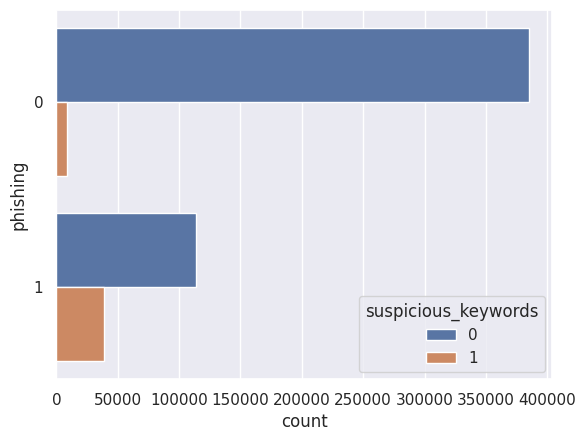

In [ ]:
import seaborn as sns
sns.set(style='darkgrid')

a = sns.countplot(
    y='phishing',
    data=df,
    hue='suspicious_keywords')

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['newlabel'] = le.fit_transform(df['phishing'])
df['newlabel'].value_counts()

0    393555
1    152340
Name: newlabel, dtype: int64

In [ ]:
X = df[['haveIP','IsGoogleIndex','is_shortening_services','suspicious_keywords','abnormal_url','is_https','is_http','redirection','questionmark','hyphen','equals','percentage','dot_count','count_www','count_at','count_directory','Url_length','hostname_length','count_digits','count_letters','firstDir_length','tld_length']]

Y = df['newlabel']

In [ ]:
Y.tail(10)

545885    1
545886    1
545887    1
545888    1
545889    1
545890    1
545891    1
545892    1
545893    1
545894    1
Name: newlabel, dtype: int64

In [ ]:
X.columns

Index(['haveIP', 'IsGoogleIndex', 'is_shortening_services',
       'suspicious_keywords', 'abnormal_url', 'is_https', 'is_http',
       'redirection', 'questionmark', 'hyphen', 'equals', 'percentage',
       'dot_count', 'count_www', 'count_at', 'count_directory', 'Url_length',
       'hostname_length', 'count_digits', 'count_letters', 'firstDir_length',
       'tld_length'],
      dtype='object')

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    stratify=Y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=123)


In [ ]:
X_train

,haveIP,IsGoogleIndex,is_shortening_services,suspicious_keywords,abnormal_url,is_https,is_http,redirection,questionmark,hyphen,...,dot_count,count_www,count_at,count_directory,Url_length,hostname_length,count_digits,count_letters,firstDir_length,tld_length
38725,0,1,0,1,1,1,1,0,1,1,...,1,0,0,0,1,0,0,1,0,3
482134,0,1,0,0,1,0,1,0,0,0,...,1,0,0,1,1,1,1,1,0,3
365779,0,1,0,0,1,1,1,0,0,1,...,0,0,0,0,1,0,1,0,1,3
48965,0,1,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,3
437017,0,1,0,0,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534254,0,1,0,0,1,1,1,0,0,1,...,0,0,0,1,1,0,1,1,1,3
178697,0,1,0,0,1,1,1,0,0,0,...,0,0,0,1,1,0,1,0,0,3
361853,0,1,0,0,1,1,1,0,0,1,...,0,0,0,0,1,0,0,1,0,3
359395,0,1,0,0,1,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,3


In [ ]:
X_test

,haveIP,IsGoogleIndex,is_shortening_services,suspicious_keywords,abnormal_url,is_https,is_http,redirection,questionmark,hyphen,...,dot_count,count_www,count_at,count_directory,Url_length,hostname_length,count_digits,count_letters,firstDir_length,tld_length
400571,0,1,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,3
31566,0,1,0,0,1,1,1,0,1,1,...,0,0,0,0,1,0,0,1,1,3
377650,0,1,0,0,1,1,1,0,0,1,...,0,0,0,0,1,0,0,0,1,3
424069,0,1,0,0,1,1,1,0,0,1,...,0,0,0,0,1,0,0,1,0,3
20416,0,1,0,1,1,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489130,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3
437419,0,1,0,0,1,1,1,0,1,1,...,1,0,0,0,1,1,1,1,0,3
541627,0,1,1,0,1,1,1,0,0,0,...,0,0,0,1,1,0,1,0,0,3
84504,0,1,0,0,1,1,2,0,0,1,...,0,0,0,0,0,0,0,0,0,3


In [ ]:
Y_train

38725     1
482134    1
365779    0
48965     0
437017    0
         ..
534254    1
178697    0
361853    0
359395    0
175372    0
Name: newlabel, Length: 436716, dtype: int64

In [ ]:
Y_test

400571    0
31566     1
377650    0
424069    0
20416     1
         ..
489130    1
437419    0
541627    1
84504     0
44899     1
Name: newlabel, Length: 109179, dtype: int64

# Train and Test Split

In [ ]:
#X = df['']

In [ ]:
#Y = df['']

# Model Implementation

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rf = RandomForestClassifier(n_estimators=100,max_features='sqrt')
rf.fit(X_train,Y_train)

y_pred = rf.predict(X_test)

#X_testnu --> user url?

print(classification_report(Y_test,y_pred,target_names=['benign','malicious',]))

score = metrics.accuracy_score(Y_test,y_pred)

print("Accuracy : %f" % score)
cm = confusion_matrix(Y_test, y_pred)
print(confusion_matrix(Y_test, y_pred))

              precision    recall  f1-score   support

      benign       0.94      0.99      0.96     78711
   malicious       0.97      0.83      0.90     30468

    accuracy                           0.95    109179
   macro avg       0.96      0.91      0.93    109179
weighted avg       0.95      0.95      0.95    109179

Accuracy : 0.946418
[[78017   694]
 [ 5156 25312]]


<Axes: >

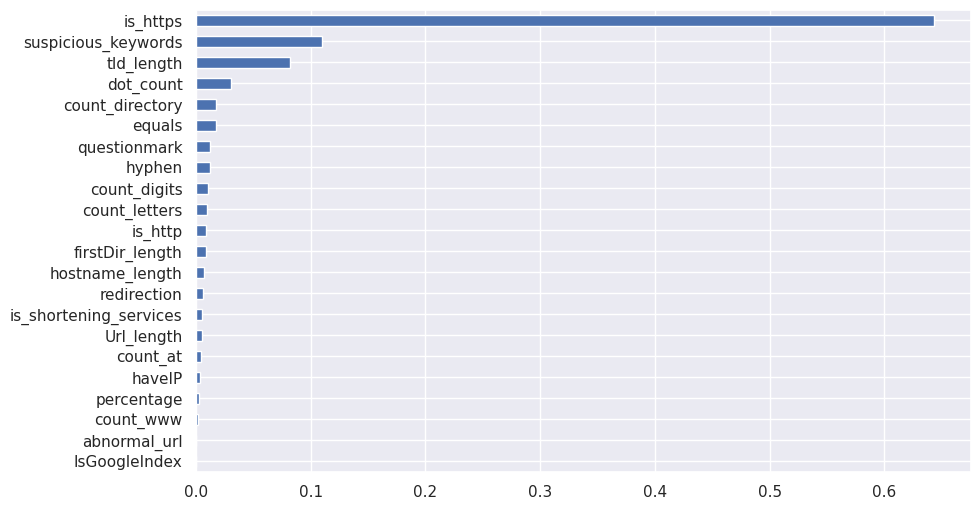

In [ ]:
important_features = pd.Series(rf.feature_importances_,
                               index=X_train.columns)
important_features.sort_values().plot(kind='barh',
                                      figsize=(10,6))

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,Y_train)
y_pred = lr.predict(X_test)
print(classification_report(Y_test,y_pred,target_names=['benign','malicious',]))

score = metrics.accuracy_score(Y_test,y_pred)

print("Accuracy : %f" % score)
cm = confusion_matrix(Y_test, y_pred)
print(confusion_matrix(Y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

      benign       0.93      0.98      0.95     78711
   malicious       0.95      0.80      0.87     30468

    accuracy                           0.93    109179
   macro avg       0.94      0.89      0.91    109179
weighted avg       0.93      0.93      0.93    109179

Accuracy : 0.932102
[[77385  1326]
 [ 6087 24381]]


In [ ]:
from sklearn.naive_bayes import GaussianNB
gaussian=GaussianNB()
gaussian.fit(X_train,Y_train)
y_pred = gaussian.predict(X_test)
print(classification_report(Y_test,y_pred,target_names=['benign','malicious',]))

score = metrics.accuracy_score(Y_test,y_pred)

print("Accuracy : %f" % score)
cm = confusion_matrix(Y_test, y_pred)
print(confusion_matrix(Y_test, y_pred))

              precision    recall  f1-score   support

      benign       0.91      0.99      0.95     78711
   malicious       0.97      0.74      0.84     30468

    accuracy                           0.92    109179
   macro avg       0.94      0.87      0.89    109179
weighted avg       0.93      0.92      0.92    109179

Accuracy : 0.921725
[[78049   662]
 [ 7884 22584]]


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=300,learning_rate=0.05,random_state=100,max_features=5 )
gbc.fit(X_train,Y_train)
y_pred = gbc.predict(X_test)
print(classification_report(Y_test,y_pred,target_names=['benign','malicious',]))

score = metrics.accuracy_score(Y_test,y_pred)

print("Accuracy : %f" % score)
cm = confusion_matrix(Y_test, y_pred)
print(confusion_matrix(Y_test, y_pred))


              precision    recall  f1-score   support

      benign       0.93      0.99      0.96     78711
   malicious       0.97      0.81      0.88     30468

    accuracy                           0.94    109179
   macro avg       0.95      0.90      0.92    109179
weighted avg       0.94      0.94      0.94    109179

Accuracy : 0.939750
[[78046   665]
 [ 5913 24555]]


In [ ]:
from sklearn.linear_model import RidgeClassifier
rc = RidgeClassifier()
rc.fit(X_train,Y_train)
y_pred = rc.predict(X_test)
print(classification_report(Y_test,y_pred,target_names=['benign','malicious',]))

score = metrics.accuracy_score(Y_test,y_pred)

print("Accuracy : %f" % score)
cm = confusion_matrix(Y_test, y_pred)
print(confusion_matrix(Y_test, y_pred))

              precision    recall  f1-score   support

      benign       0.91      1.00      0.95     78711
   malicious       0.98      0.75      0.85     30468

    accuracy                           0.93    109179
   macro avg       0.95      0.87      0.90    109179
weighted avg       0.93      0.93      0.92    109179

Accuracy : 0.926918
[[78359   352]
 [ 7627 22841]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(X_train,Y_train)
y_pred = classifier.predict(X_test)
print(classification_report(Y_test,y_pred,target_names=['benign','malicious',]))

score = metrics.accuracy_score(Y_test,y_pred)

print("Accuracy : %f" % score)
cm = confusion_matrix(Y_test, y_pred)
print(confusion_matrix(Y_test, y_pred))

              precision    recall  f1-score   support

      benign       0.94      0.99      0.96     78711
   malicious       0.97      0.83      0.90     30468

    accuracy                           0.95    109179
   macro avg       0.96      0.91      0.93    109179
weighted avg       0.95      0.95      0.94    109179

Accuracy : 0.946208
[[78049   662]
 [ 5211 25257]]


In [ ]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
model = LGBMClassifier()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
print(classification_report(Y_test,y_pred,target_names=['benign','malicious',]))

score = metrics.accuracy_score(Y_test,y_pred)

print("Accuracy : %f" % score)
cm = confusion_matrix(Y_test, y_pred)
print(confusion_matrix(Y_test, y_pred))
#disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
#disp.plot(cmap = 'Greens', values_format='')

[LightGBM] [Info] Number of positive: 121872, number of negative: 314844
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.163752 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 72
[LightGBM] [Info] Number of data points in the train set: 436716, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.279065 -> initscore=-0.949106
[LightGBM] [Info] Start training from score -0.949106
              precision    recall  f1-score   support

      benign       0.94      0.99      0.96     78711
   malicious       0.97      0.83      0.89     30468

    accuracy                           0.95    109179
   macro avg       0.96      0.91      0.93    109179
weighted avg       0.95      0.95      0.94    109179

Accuracy : 0.945347
[[78043   668]
 [ 5299 25169]]


In [ ]:
import joblib
joblib.dump(rf,'phishingprediction_model.pkl')

['phishingprediction_model.pkl']

# Prediction-Don't do it now..

In [ ]:
#Need to make some changes..Soo dont do it now..
def main(url):
  l = []

  '''haveIP', 'IsGoogleIndex', 'is_shortening_services', 'suspicious_keywords', 'abnormal_url',
       'is_https', 'is_http', 'redirection', 'questionmark',
       'hyphen', 'equals', 'percentage', 'dot_count',
       'count_www', 'count_at', 'count_directory', 'Url_length',
       'hostname_length', 'count_digits', 'count_letters', 'firstDir_length'''

  l.append(haveIP(url))
  l.append(IsGoogleIndex(url))
  l.append(is_shortening_services(url))
  l.append(suspicious_keywords(url))
  l.append(abnormal_url(url))
  l.append(is_https(url))
  l.append(is_http(url))
  l.append(redirection(url))
  l.append(questionmark(url))
  l.append(hyphen(url))
  l.append(equals(url))
  l.append(percentage(url))
  l.append(dot_count(url))
  l.append(count_www(url))
  l.append(count_at(url))
  l.append(count_directory(url))
  l.append(Url_length(url))
  l.append(hostname_length(url))
  l.append(count_digits(url))
  l.append(count_letters(url))
  l.append(firstDir_length(url))


  tld = get_tld(url,fail_silently=True)

  l.append(tld_length(tld))






  return l

In [ ]:
def prediction(user_url):
  user_features = main(user_url)

  user_features = np.array(user_features).reshape((1,-1))

  prediction = rf.predict(user_features)
  #Replace model with model object name

  if int(prediction[0]) == 0:
    return "Legitimate"
  else:
    return "Phishing"


In [ ]:
user_url = str(input("Enter url :: "))

print(prediction(user_url))

Enter url :: https://www.amazon.in/Indian-Garage-Co-Checkered-0121-SH72-04_White/dp/B08ZNF8ZDH/ref=sr_1_1?dib=eyJ2IjoiMSJ9.eDg5e7FRvG0367uGKDGL4_HdnwH6k_KX5uFgF6RjJtQfsBHf6IHwRY4nX_Pn8ru6f2LyO_kaI0r4IWHJyfFrJ63Pew1T4laTHxuvQskEqvk.mxNY5js5VnGQjhFh0PHaJqhkEJl8SBZXiCIuoK0pyRk&dib_tag=se&pf_rd_i=1968024031&pf_rd_m=A1VBAL9TL5WCBF&pf_rd_p=2ab143ba-f92e-41e9-ae49-f9be9f8e5228&pf_rd_r=CGPX5P8056MK0H1PW3SQ&pf_rd_s=merchandised-search-8&qid=1710087779&refinements=p_85%3A10440599031%2Cp_89%3AAllen+Solly%7CAmazon+Brand+-+Symbol%7CAndamen%7CAntony+Morato%7CArrow%7CBewakoof%7CCalvin+Klein%7CCampus+Sutra%7CCavallo+by+Linen+Club%7CColumbia%7CJack+%26+Jones%7CLacoste%7CLee%7CLevi%27s%7CLinen+Club%7CMarks+%26+Spencer%7CPepe+Jeans%7CPeter+England%7CSimon+Carter%7CSpykar%7CSymbol+premium%7CThe+Indian+Garage+Co%7CThe+Souled+Store%7CTommy+Hilfiger%7CU.S.+POLO+ASSN.%7CUNITED+COLORS+OF+BENETTON%7CVan+Heusen%7CVeirdo%7CWrangler%7Cblackberrys%2Cp_n_deal_type%3A26921224031%2Cp_n_pct-off-with-tax%3A2665401031&rn

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Make a frontend feature extraction program with same order of features...